# Research assignment 4


[Jovana Ramos]

[Income and Education Interacting with Race and Sex] 

[3/18/2020]

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

In [1]:
clear
cd C:\Users\Jovis\Desktop\SOC_211 
capture log close
*log using Assignment_8.log
set more off
use GSS2018w7, clear



C:\Users\Jovis\Desktop\SOC_211





    A. Write at least two hypotheses involving at least 2 of the following types of interactions
        1) nominal * nominal
I hypothesize that an individual’s race and sex influence the number of schooling years the individual has completed, when age is controlled.

        2) nominal * interval-ratio
I hypothesize that an individual’s income is influence by they sex and the number of schooling years they have completed, when age is controlled. 

        3) interval-ratio * interval-ratio
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves (IV's: race and sex)
1st hypothesis: I predict that the dependent variable and the independent variables will have a positive and negative association, depending on the independent variables.
2nd hypothesis: I predict that the dependent variable and the independent variables will have a positive and negative association, depending on the independent variables.

        2) the interaction of the 2 indendent variables
1st hypothesis: I predict that the individuals who are classified as females will have more years of schooling completed compared to males, when controlled for age. 
2nd Hypothesis: I predict that women even those with high levels of education will still have lower levels of incomes compare to men, when controlled for age.

        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
Certain studies show that women are currently receiving more higher education degrees than men are.
Research has shown that there is a gender gap in income. Men have higher levels of income than women even when they have the same levels of education and similar skill sets.

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate a 1 model with uninteracted variables and 1 model with interacted variables. 
    
    Use --esttab-- with %html magic to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [2]:
*Nominal * Nominal
gen age2=age^2
xi i.race*i.sex, noomit
describe educ


(7 missing values generated)

i.race*i.sex      _IracXsex_#_#       (coded as above)


              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
educ            byte    %8.0g      LABK       Highest year of school completed


In [3]:
est clear
qui eststo: reg educ i.race i.sex age age2
qui eststo: reg educ i.race##i.sex age age2

In [4]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(age age2 _cons)  ///
  coeflabels (2.race "Black" 3.race "Other" 2.sex "Female" 2.race#2.sex "Black female" /// 
  3.race#2.sex "Other female")  html

This front-end or document format cannot display HTML

Margins

In [5]:
gen educln=log(educ)

(7 missing values generated)






  Variables that uniquely identify margins: sex race


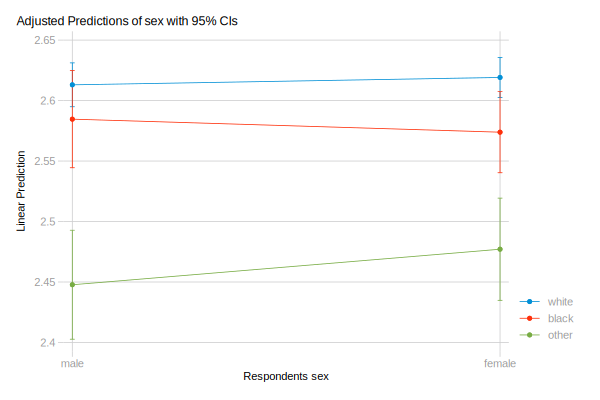

In [7]:
quietly eststo: reg educln i.race##i.sex age age2
quietly margins i.sex, over(race) atmeans
marginsplot, scheme(538w)





  Variables that uniquely identify margins: race sex


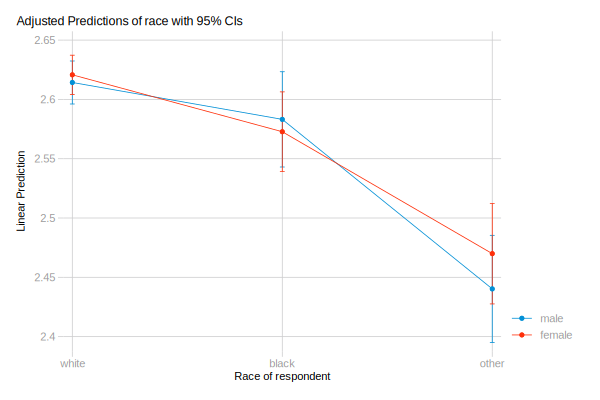

In [9]:
quietly eststo: reg educln i.race##i.sex age age2 
quietly margins i.race, over(sex) atmeans
marginsplot, scheme(538w)

In [11]:
gen realrincln=log(realrinc)

(985 missing values generated)


In [12]:
*nominal * interval-ratio
est clear

quietly eststo: reg realrincln i.sex educ age age2
quietly eststo: reg realrincln i.sex##c.educ age age2

In [13]:
%html
esttab, stats(r2 N, labels("R2" "N") fmt(%10.2fc %10.0fc)) cells(b(star fmt(%10.0fc)) se(fmt(%6.0fc) par) N (fmt(%10.0fc)) r2 (fmt(%10.2f))) ///
  nobase noconstant starlevels(* .1 ** .05 *** .01) mlabels("Model 1" "Model 2") drop(age age2 _cons)  ///
  coeflabels (2.race "Black" 3.race "Other" 2.sex "Female" 2.race#2.sex "Black female" /// 
  3.race#2.sex "Other female")  html

This front-end or document format cannot display HTML




  Variables that uniquely identify margins: educ sex


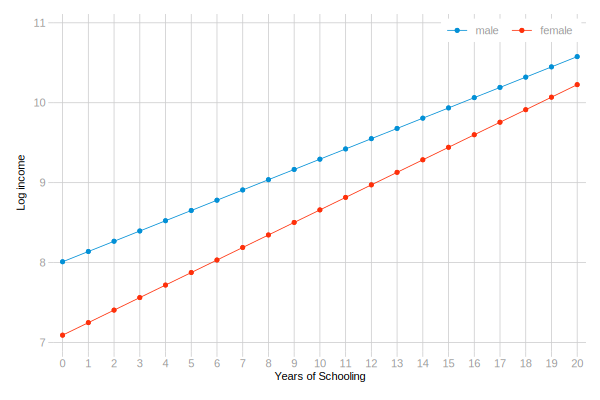

In [14]:
quietly margins sex, at(educ=(0(1)20)) atmeans
marginsplot, noci legend(on) title("") subtitle("") xtitle("Years of Schooling") ///
  ytitle("Log income") legend(rows(1) position(1) ring(0)) scheme(538w)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
Hypothesis 1: My results support part of my hypothesis. I hypothesize that females would have more education than males. My results show that only white females have more education than white males. Besides these results, females considered Other or Black have lower levels of education compare to white, Black, and males considered Other.
Hypothesis 2: My results support my hypothesis. I predicted that women would have lower levels of income than men. My results show that even when males and females have the same number of years of schooling, males still have higher levels of income.  
    
    B. Why do the regression coefficients support or contradict your hypotheses?
If I were to only examine the regression coefficients, they don't say much about the relationship between my variables. The regression coefficients do not support my hypothesis.
 
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values
    support or contradict your hypotheses?
The regression adjusted estimates from margins support my hypothesis, the graphs show that the income gap between females and males with 20+ years of schooling lessens.